<a href="https://colab.research.google.com/github/tricktx/Python-para-Analise-de-Dados/blob/main/4%C2%B0_Projeto_An%C3%A1lise_do_mercado_de_jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as devidas bibliotecas.



In [1]:
#Importando bibliotecas

import pandas as pd #Fornece estruturas de dados de alto nível e uma grande variedade de ferramentas para análise.
import numpy as np #Processamento de grandes matrizes e matrizes multidimensionais

##Visualização Gráfica
import matplotlib.pyplot as plt #Criação de diagramas e gráficos bidimensionais
import seaborn as sns #Há uma rica galeria de visualizações, incluindo alguns tipos complexos, como séries temporais e etc.
import plotly.express as px #Permite construir facilmente gráficos sofisticados, como gráficos 3D, gráficos ternários e etc.
import plotly.graph_objects as go

## Usando o pandas para trazer a base de dados em csv e analisando a base.

In [2]:
df = pd.read_csv('/content/PS4_GamesSales.csv', header=0, encoding='unicode_escape')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
df.rename(columns={
    'Game' : 'Jogos',
    'Year' : 'Ano de lançamento',
    'Genre' : 'Gênero',
    'Publisher' : 'Empresa',
    'North America' : 'EUA',
    'Europe' : 'Europa',
    'Japan' : 'Japão',
    'Rest of World' : 'Restante do mundo'
}, inplace=True)
df.head()

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jogos              1034 non-null   object 
 1   Ano de lançamento  825 non-null    float64
 2   Gênero             1034 non-null   object 
 3   Empresa            825 non-null    object 
 4   EUA                1034 non-null   float64
 5   Europa             1034 non-null   float64
 6   Japão              1034 non-null   float64
 7   Restante do mundo  1034 non-null   float64
 8   Global             1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [5]:
df.describe()

,Ano de lançamento,EUA,Europa,Japão,Restante do mundo,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [6]:
df.shape

(1034, 9)

In [7]:
df.isnull().sum()

Jogos                  0
Ano de lançamento    209
Gênero                 0
Empresa              209
EUA                    0
Europa                 0
Japão                  0
Restante do mundo      0
Global                 0
dtype: int64

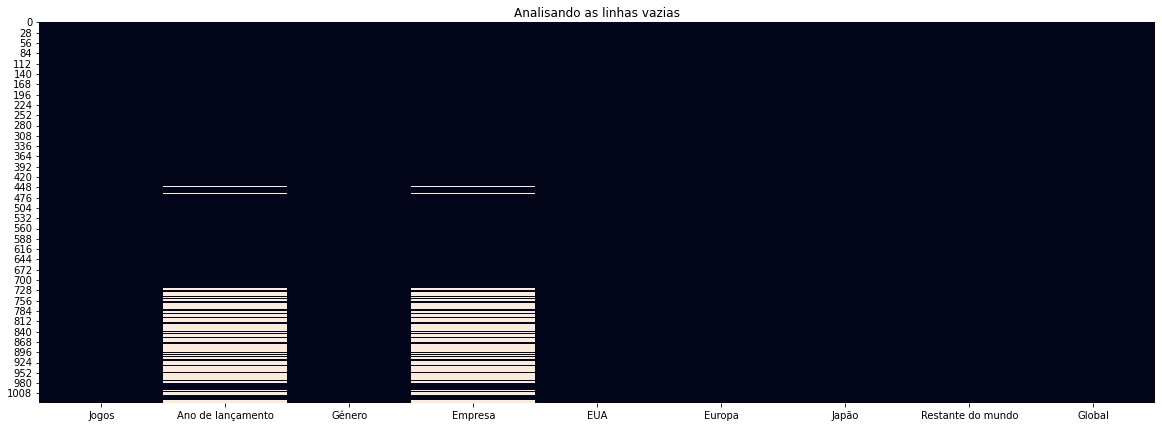

In [8]:
plt.figure(figsize=(20,7))
plt.title('Analisando as linhas vazias')
sns.heatmap(df.isnull(), cbar=False);

In [9]:
df = df.dropna()
df.isnull().sum()


Jogos                0
Ano de lançamento    0
Gênero               0
Empresa              0
EUA                  0
Europa               0
Japão                0
Restante do mundo    0
Global               0
dtype: int64

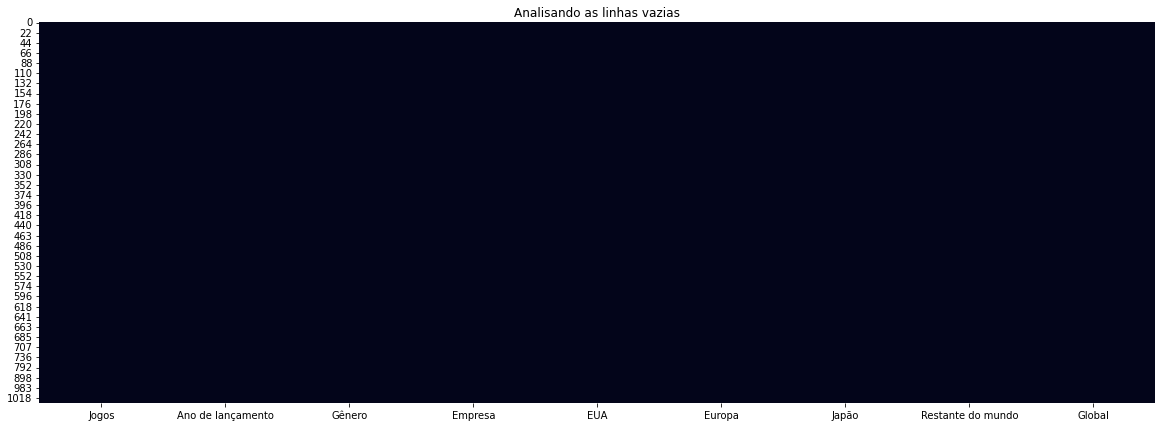

In [10]:
plt.figure(figsize=(20,7))
plt.title('Analisando as linhas vazias')
sns.heatmap(df.isnull(), cbar=False)

In [11]:
#Verificando valores unicos
df.nunique()

Jogos                824
Ano de lançamento      8
Gênero                17
Empresa              152
EUA                  129
Europa               139
Japão                 45
Restante do mundo     85
Global               206
dtype: int64

In [12]:
df['Gênero'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Misc', 'Platform', 'Racing', 'Fighting', 'Adventure', 'MMO',
       'Simulation', 'Music', 'Party', 'Strategy', 'Puzzle',
       'Visual Novel'], dtype=object)

In [13]:
df['Gênero'].nunique()

17

In [30]:
df.pizza2 = round(df['Gênero'].value_counts(normalize=True)*100,2);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [15]:
df['Empresa'].value_counts().head()

Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
Name: Empresa, dtype: int64

In [16]:
df['Empresa'].value_counts(normalize=True)

Namco Bandai Games                0.067879
Sony Interactive Entertainment    0.056970
Ubisoft                           0.054545
Square Enix                       0.048485
Tecmo Koei                        0.044848
                                    ...   
Take-Two Interactive              0.001212
CokeM Interactive                 0.001212
Frontier Developments             0.001212
Mojang                            0.001212
Tammeka Games                     0.001212
Name: Empresa, Length: 152, dtype: float64

In [17]:
df['Gênero'].value_counts(normalize=True)

Action              0.248485
Role-Playing        0.129697
Shooter             0.090909
Adventure           0.086061
Sports              0.083636
Misc                0.066667
Racing              0.058182
Action-Adventure    0.046061
Platform            0.040000
Fighting            0.038788
Strategy            0.030303
Simulation          0.025455
Music               0.021818
Puzzle              0.012121
MMO                 0.009697
Visual Novel        0.009697
Party               0.002424
Name: Gênero, dtype: float64

In [18]:
df.pizza = round(df['Empresa'].value_counts(normalize=True)*100,2);
df.pizza.head(7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Namco Bandai Games                6.79
Sony Interactive Entertainment    5.70
Ubisoft                           5.45
Square Enix                       4.85
Tecmo Koei                        4.48
Activision                        3.64
Capcom                            3.64
Name: Empresa, dtype: float64

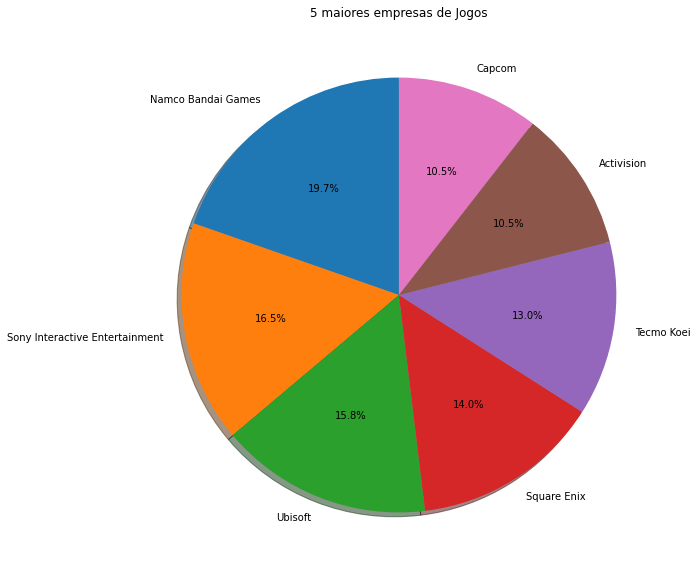

In [19]:
plt.figure(figsize=(30,10))
plt.title('5 maiores empresas de Jogos')

plt.pie(df.pizza.head(7),
        labels = df.pizza.index[0:7],
        shadow = True,
        startangle=90, # Direção do gráfico 
        autopct='%1.1f%%'
);

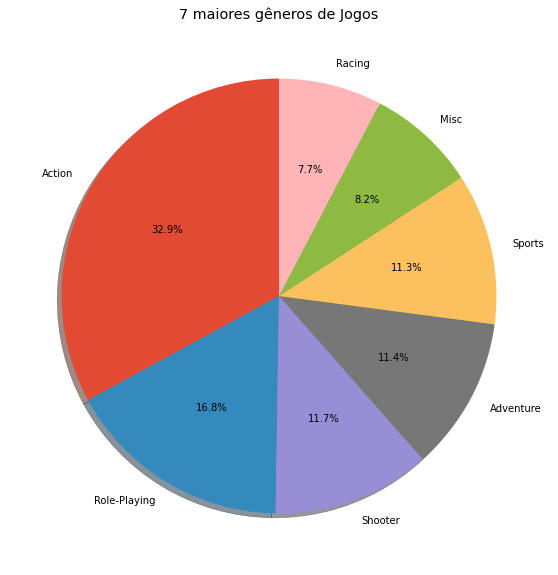

In [31]:
#Tamanho do gráfico
plt.figure(figsize=(30,10))
#Título
plt.title('7 maiores gêneros de Jogos')
#Plotagem do gráfico
plt.pie(df.pizza2.head(7),
        labels = df.pizza2.index[0:7],
        shadow = True,
        startangle=90, # Direção do gráfico 
        autopct='%1.1f%%'
);

In [21]:
#Agrupamento para ver a contagem de dados pela coluna "Ano de lançamento"
df.groupby(by=['Ano de lançamento']).sum()

,EUA,Europa,Japão,Restante do mundo,Global
Ano de lançamento,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20
2019.0,0.00,0.00,0.00,0.00,0.00
2020.0,0.00,0.00,0.00,0.00,0.00


In [22]:
#barWidth = 0.25
#plt.figure(figsize=(20,7))
#plt.title('Analise de vendas no Continente Europeu')

#r1 = np.arange(le('EUA'))
#r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]

#plt.bar(r1, 'EUA', color ='r', width = barWidth,
#        edgecolor ='grey', label ='EUA')
#plt.bar(r2, 'Europa', color ='g', width = barWidth,
#        edgecolor ='grey', label ='Europa')
#plt.bar(r3, 'Japão', color ='b', width = barWidth,
#        edgecolor ='grey', label ='Japão')

#plt.xlabel('Ano', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len('EUA'))],
#        ['2015', '2016', '2017', '2018', '2019'])
#
#plt.legend()
#plt.show()

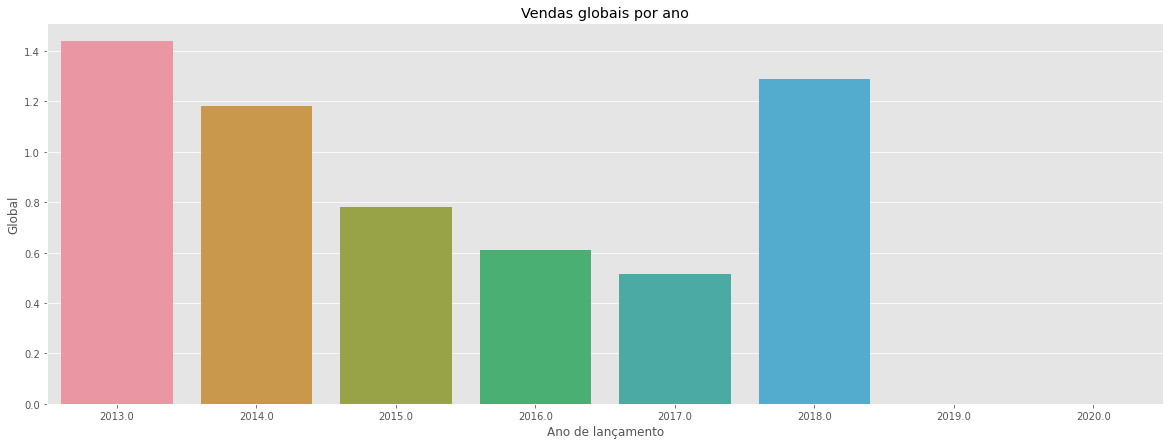

In [23]:
#Tamanho do gráfico
plt.figure(figsize=(20,7))
# Estilo do Gráfico
plt.style.use('ggplot')
#Título do gráfico
plt.title('Vendas globais por ano')
#Plotagem do gráfico
sns.barplot(data=df,
            x='Ano de lançamento',
            y='Global',
            ci=None);

In [24]:

df = df.loc[(df['Ano de lançamento'] != 2019 ) & (df['Ano de lançamento'] != 2020)]

df.head()

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


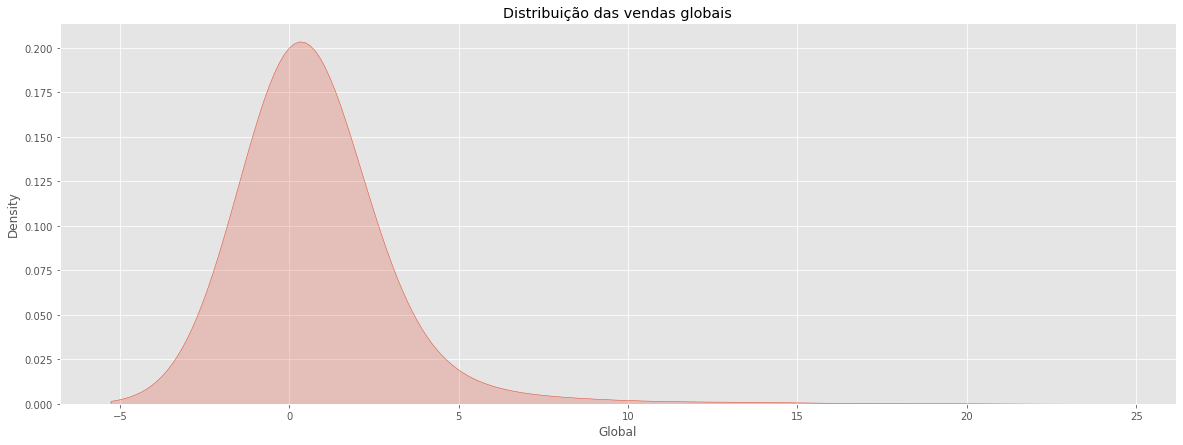

In [25]:
#Tamanho do gráfico
plt.figure(figsize=(20,7))
# Estilo do Gráfico
plt.style.use('ggplot')
#Título do gráfico
plt.title('Distribuição das vendas globais')
#Plotagem do gráfico
sns.kdeplot(df['Global'],
            shade=True, #Sombra
            bw=1
            );

Text(0, 0.5, 'Distribuição global')

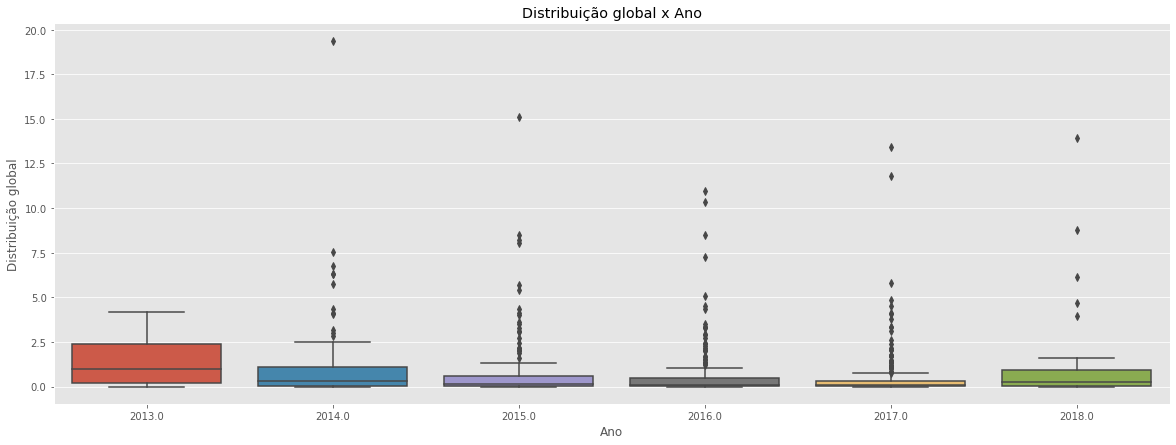

In [32]:
plt.figure(figsize=(20,7))
plt.title('Distribuição global x Ano')
sns.boxplot(data=df,
            x='Ano de lançamento',
            y='Global')

plt.xlabel('Ano')
plt.ylabel('Distribuição global')

In [36]:
df.barras = df.groupby( by=['Ano de lançamento'] ).sum().reset_index()

# Proporção de cada continente na venda de jogos globais, colocando em 100% de barras.
America = [ America / Total * 100 for America, Total in zip( df.barras['EUA'], df.barras['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( df.barras['Europa'], df.barras['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( df.barras['Japão'], df.barras['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( df.barras['Restante do mundo'], df.barras['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [38]:
df.head()

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


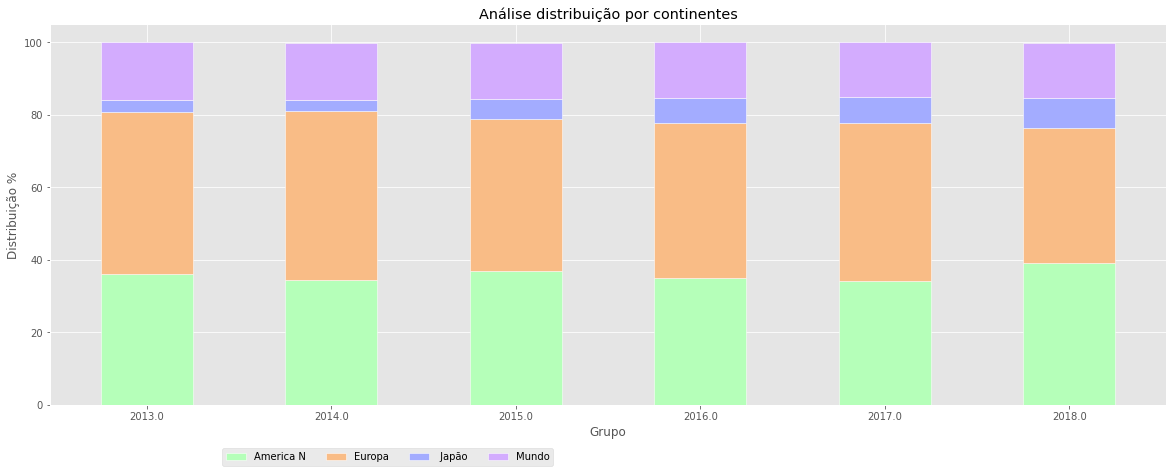

In [42]:
# Tamanho 
plt.figure( figsize=(20, 7) )

# LArgura barra no gráfico
Largura_Barra = 0.50
Rotulos = df.barras['Ano de lançamento']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes')

# Plotagem de vendas na América
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plotagem de vendas na Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plotagem de vendas no Japão
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plotagem de vendas no mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );